In [391]:
%cd "/Users/adisriram/Downloads/kkbox-music-recommendation-challenge"

/Users/adisriram/Downloads/kkbox-music-recommendation-challenge


In [453]:
import pandas as pd
train = pd.read_csv('train_df.csv')
test = pd.read_csv('test_df.csv')

<ipython-input-453-df5ef0daf034>:3: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test_df.csv')


In [454]:
#Filter out where age is zero or greater than 75
train = train[(train['bd'] >= 0) & (train['bd'] <= 75)]
test = test[(test['bd'] >= 0) & (test['bd'] <= 75)]

In [455]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train, test_size=0.2, random_state=42)

In [456]:
train_data.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'language', 'msno', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'name', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date',
       'membership_days', 'registration_year', 'registration_month',
       'registration_day', 'expiration_year', 'expiration_month',
       'expiration_day', 'first_genre_id', 'second_genre_id', 'third_genre_id',
       'genre_ids_count', 'artist_count', 'first_artist_name', 'country_code',
       'registration_code', 'song_year', 'no_isrc', 'member_song_count',
       'artist_song_count', 'genre_song_count', 'lang_song_count',
       'song_member_count', 'age_song_count'],
      dtype='object')

In [457]:
from sklearn.preprocessing import StandardScaler
def transform_numercal_features(tr_data, val_data, test):
  
  numeric_features = ['bd', 'song_length', 'membership_days', 'genre_ids_count', 'artist_count', 
  'member_song_count', 'artist_song_count','genre_song_count', 'lang_song_count', 'song_member_count',
  'age_song_count']

  # transform numeric values
  for feature in numeric_features:
    scaler = StandardScaler()
    tr_data[feature] = scaler.fit_transform(tr_data[feature].values.reshape(-1,1))
    val_data[feature] = scaler.transform(val_data[feature].values.reshape(-1,1))
    test[feature] = scaler.transform(test[feature].values.reshape(-1,1))
  
  return tr_data, val_data, test

In [458]:
train_data, val_data, test = transform_numercal_features(train_data, val_data, test)

In [459]:
train_data.head()

,song_id,song_length,genre_ids,artist_name,composer,language,msno,source_system_tab,source_screen_name,source_type,...,country_code,registration_code,song_year,no_isrc,member_song_count,artist_song_count,genre_song_count,lang_song_count,song_member_count,age_song_count
5142624,4ZX6LBPxno7dKBssmuv7IlBHISI7hU5Vd5AaoN176DE=,-2.379894,1259,頑童MJ116,頑童MJ116,3.0,oGrHQJ8YKF7qcyutbiH5/X7+Gjn7VieN1QMKlhKbjRQ=,my library,Album more,album,...,TW,A45,2014.0,0.0,-0.313981,-0.326722,-1.250975,0.856891,-0.592684,-0.772317
3149579,B0aK8rIRcZLXF5ku0+nPMMkhAKMDtc9DBH3teeJxigg=,1.012967,465,曹格 (Gary Chaw),REID ANTONIO M. SIMMONS DARYL+EDMONDS KENNETH B,3.0,jbV+lsBsMOOrGuh7x3jME4IsgVa1ia0ousrp2xeKCF4=,my library,Local playlist more,local-playlist,...,TW,A45,2005.0,0.0,0.065003,-0.411620,0.943002,0.856891,-0.395891,-0.755202
4505457,u4KmHU1fppqTpi4m0qIzw/7rW3RwCFrU4k+EKEuRGNE=,-0.712155,444,Ailee,no_composer,31.0,I2fvrYpseCvLLCgJNz/zE4AG7FO9HXxI9/0pp5uFlbw=,search,Album more,album,...,KR,A38,2015.0,0.0,-0.799010,-0.491006,-1.191679,-1.426011,-0.636157,1.226289
6752137,Q7KRIZ+4M1zHhD5lEFLrcDE3/J1VTfPQyO2EiZMO0rA=,-0.879706,444,2PM,no_composer,31.0,Nz99nNouC2v5sqw9ekn3YjGZ+9lKBy4XPejFOncXuLE=,my library,Local playlist more,local-playlist,...,US,5TA,2014.0,0.0,-0.578226,-0.533584,-1.191679,-1.426011,-0.630723,1.226289
5775676,YBrWf/Hac5La5V2HZ80Mi70NzUcTehVDWhkIp8h4Klg=,0.311750,458,蔡依林 (Jolin Tsai),Huang-Zhong-Ren| Jay Chou,3.0,/uCMbm3tnd6lhKx6SIEbe0pjlsdXn87kVpTcMgPZ0x0=,my library,Local playlist more,local-library,...,TW,A47,2004.0,0.0,-0.275735,0.144240,-0.595662,0.856891,0.335386,-0.772317


In [460]:
columns_to_drop = ['genre_ids', 'artist_name']

# Drop the columns from each DataFrame
train_data = train_data.drop(columns=columns_to_drop)
val_data = val_data.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

columns_to_drop = ['registration_init_time', 'expiration_date']
train_data = train_data.drop(columns=columns_to_drop)
val_data = val_data.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

In [461]:
train_data['first_artist_name'] = train_data['first_artist_name'].fillna('first_artist_name_missing')
val_data['first_artist_name'] = val_data['first_artist_name'].fillna('first_artist_name_missing')
test['first_artist_name'] = test['first_artist_name'].fillna('first_artist_name_missing')

In [462]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
def encode_categorical_features(tr_data, val_data, test_all):
    cat_features = ['msno', 'composer','song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'gender',
  'registered_via', 'name', 'registration_year','expiration_year', 'first_genre_id', 'second_genre_id',
  'third_genre_id', 'first_artist_name', 'country_code',
  'registration_code','song_year', 'language']  # Replace with your actual categorical column names

    # Transform categorical values
    for feature in cat_features:
        le = LabelEncoder()
        
        # Combine the training, validation, and test data to maintain consistent encoding
        combined = pd.concat([tr_data[feature], val_data[feature], test_all[feature]], ignore_index=True)
        
        # Handle mixed types and missing values by converting everything to strings
        combined = combined.astype(str)
        
        le.fit(combined)
        
        # Transform and assign back to the respective DataFrames
        tr_data[feature] = le.transform(tr_data[feature].astype(str))
        val_data[feature] = le.transform(val_data[feature].astype(str))
        test_all[feature] = le.transform(test_all[feature].astype(str))
    
    return tr_data, val_data, test_all

In [463]:
train_data, val_data, test = encode_categorical_features(train_data, val_data, test)

In [464]:
train_data.iloc[0]

song_id                43534.000000
song_length               -2.379894
composer               85115.000000
language                   4.000000
msno                   28102.000000
source_system_tab          3.000000
source_screen_name         0.000000
source_type                0.000000
target                     0.000000
name                  142475.000000
city                       4.000000
bd                         0.690589
gender                     0.000000
registered_via             2.000000
membership_days           -1.031303
registration_year         12.000000
registration_month         1.000000
registration_day           6.000000
expiration_year           14.000000
expiration_month           4.000000
expiration_day            14.000000
first_genre_id            34.000000
second_genre_id            0.000000
third_genre_id             0.000000
genre_ids_count            0.219900
artist_count              -0.158743
first_artist_name      43853.000000
country_code             101

In [404]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Separate features and target from training and validation data
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

X_val = val_data.drop('target', axis=1)
y_val = val_data['target']

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target on validation data
y_pred = logreg.predict(X_val)

# Calculate accuracy score on the validation data
accuracy = accuracy_score(y_val, y_pred)

# Print the accuracy
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 51.84%


In [406]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val, y_pred)
print(f"Validation AUC: {auc:.2f}")

Validation AUC: 0.52


In [18]:
import pandas as pd
from skranger.ensemble import RangerForestClassifier
from sklearn.datasets import load_iris
from tqdm import tqdm
import time

# Separate features and target from training and validation data
print("Preparing training and validation data...")
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

X_val = val_data.drop('target', axis=1)
y_val = val_data['target']

# Create a Random Forest classifier with default parameters
rfc = RangerForestClassifier(
    n_estimators=200,        # Number of trees
    max_depth=10,             # Maximum depth of trees
    min_node_size=5,         # Minimum size of nodes  
    n_jobs=-1,               # Use all available CPU cores,
    verbose=True              # Enable verbose logging
)


# Fit the model
print("Fitting the Ranger Forest model...")
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_val)

# Optionally, you can calculate accuracy on the validation set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, predictions)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Preparing training and validation data...
Fitting the Ranger Forest model...
Validation Accuracy: 65.32%


In [22]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val, predictions)
print(f"Validation AUC: {auc:.2f}")


Validation AUC: 0.65


In [287]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

X_val = val_data.drop('target', axis=1)
y_val = val_data['target']

# Define the model with reasonable parameters
lgb_model = lgb.LGBMClassifier(
    n_estimators=150,        # Number of boosting iterations
    max_depth=250,            # Limit the maximum depth of each tree
    learning_rate=0.4,       # Step size shrinkage
    subsample=0.8,           # Fraction of samples to use for training
    colsample_bytree=0.8,    # Fraction of features to use for each tree
    random_state=42          # For reproducibility
)

# Fit the model to the training data
print("Fitting the LightGBM model...")
lgb_model.fit(X_train, y_train)

# Predict on validation data
y_pred = lgb_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Optional: Predict probabilities for AUC calculation if needed
predicted_probs = lgb_model.predict_proba(X_val)[:, 1]

# If you want to calculate AUC as well, import roc_auc_score and calculate it
from sklearn.metrics import roc_auc_score

# Calculate AUC
auc = roc_auc_score(y_val, predicted_probs)
print(f"Validation AUC: {auc:.2f}")



Fitting the LightGBM model...
[LightGBM] [Info] Number of positive: 2968203, number of negative: 2926364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.310053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3496
[LightGBM] [Info] Number of data points in the train set: 5894567, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503549 -> initscore=0.014196
[LightGBM] [Info] Start training from score 0.014196
Validation Accuracy: 67.67%
Validation AUC: 0.74


In [26]:
train_data.columns

Index(['song_id', 'song_length', 'composer', 'language', 'msno',
       'source_system_tab', 'source_screen_name', 'source_type', 'target',
       'name', 'city', 'bd', 'gender', 'registered_via', 'membership_days',
       'registration_year', 'registration_month', 'registration_day',
       'expiration_year', 'expiration_month', 'expiration_day',
       'first_genre_id', 'second_genre_id', 'third_genre_id',
       'genre_ids_count', 'artist_count', 'first_artist_name', 'country_code',
       'registration_code', 'song_year', 'no_isrc', 'member_song_count',
       'artist_song_count', 'genre_song_count', 'lang_song_count',
       'song_member_count', 'age_song_count'],
      dtype='object')

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separate features and target from training and validation data
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

X_val = val_data.drop('target', axis=1)
y_val = val_data['target']

# Create a Decision Tree classifier with reasonable parameters
dt_model = DecisionTreeClassifier(
    max_depth=100,            # Limit the maximum depth of the tree
    min_samples_split=10,    # Minimum number of samples required to split an internal node
    max_leaf_nodes=30,       # Limit the number of leaf nodes
    random_state=42          # For reproducibility
)

# Fit the model to the training data
print("Fitting the Decision Tree model...")
dt_model.fit(X_train, y_train)

# Use the model to predict on validation data
y_pred = dt_model.predict(X_val)

# Calculate accuracy score on validation data
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Fitting the Decision Tree model...
Validation Accuracy: 64.59%


In [ ]:
auc = roc_auc_score(y_val, y_pred)
print(f"Validation AUC: {auc:.2f}")

In [465]:
test = test.drop(columns=['id'])

In [466]:
y_pred = lgb_model.predict(test)

In [467]:
test['predicted'] = y_pred

In [468]:
## The test predictions that have a user listening to a song again
cluster_data = test[test['predicted'] == 1]

In [469]:
cluster_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,composer,language,name,city,...,registration_code,song_year,no_isrc,member_song_count,artist_song_count,genre_song_count,lang_song_count,song_member_count,age_song_count,predicted
46,13567,246547,3,9,9,-0.162973,85593,4,215765,15,...,1903,99,0.0,-1.056301,-0.451850,-1.128472,-0.984648,2.592486,-0.882863,1
48,13567,271507,3,0,0,-0.398776,75747,4,230893,15,...,1970,98,0.0,-1.056301,-0.491550,-1.128472,-0.984648,-0.518547,-0.882863,1
49,13567,375194,3,17,9,-0.153664,85885,4,241591,15,...,4314,98,0.0,-1.056301,-0.514156,-1.128472,-0.984648,-0.338445,-0.882863,1
52,13567,246789,3,8,4,0.241939,76780,4,258418,15,...,4363,88,0.0,-1.056301,0.170568,-1.128472,-0.984648,-0.450621,-0.882863,1
54,13567,304872,3,8,4,0.091448,76530,4,224731,15,...,3444,90,0.0,-1.056301,-0.387196,-0.607034,-0.984648,-0.562797,-0.882863,1


In [41]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

# Assuming lgb_model is your trained model
# And X_train is your training dataset (with feature names)

# Get feature importance
importance = lgb_model.booster_.feature_importance()
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
feature_importance_df


,Feature,Importance
30,member_song_count,553
4,msno,500
13,membership_days,485
19,expiration_day,284
16,registration_day,268
7,source_type,229
10,bd,224
34,song_member_count,185
9,city,168
6,source_screen_name,164


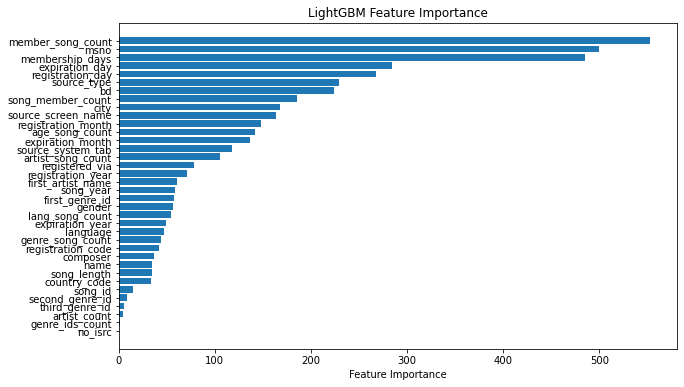

In [37]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()  # Invert the axis to have the highest importance at the top
plt.show()


In [470]:
reduced_cluster_data = cluster_data.sample(n=100000, random_state=42)

In [471]:
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

# Select features for clustering
features = ['first_genre_id', 'second_genre_id', 'third_genre_id', 'bd', 'first_artist_name', 
            'song_length', 'song_year', 'member_song_count', 'language', 'name', 'composer']

# Separate continuous and nominal features
continuous_features = ['bd', 'song_length', 'song_year', 'member_song_count']
nominal_features = ['first_genre_id', 'second_genre_id', 'third_genre_id', 'first_artist_name', 'language', 'name', 'composer']

# Extract the data for K-Prototypes
X = reduced_cluster_data[features].values

# Specify the indices of the nominal features
# K-Prototypes requires you to specify which features are nominal by their indices
nominal_indices = [0, 1, 2, 4, 8]  # Indices of nominal features in the features list

# Create K-Prototypes model
kproto = KPrototypes(n_clusters=5, init='Cao', random_state=42)

# Fit the model
cluster_labels = kproto.fit_predict(X, categorical=nominal_indices)

# Add cluster labels to the original DataFrame
reduced_cluster_data['cluster'] = cluster_labels

# Display the results


KeyboardInterrupt: 

In [452]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform the data with UMAP
X_umap = umap_reducer.fit_transform(X)

# Create a DataFrame for visualization
umap_df = pd.DataFrame(X_umap, columns=['Component 1', 'Component 2'])
umap_df['Cluster'] = reduced_cluster_data['cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Cluster', palette='viridis', data=umap_df, s=60)
plt.title('UMAP visualization of Clusters from K-Prototypes')
plt.show()



/Users/adisriram/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/adisriram/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [308]:
reduced_cluster_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,composer,language,name,city,...,song_year,no_isrc,member_song_count,artist_song_count,genre_song_count,lang_song_count,song_member_count,age_song_count,predicted,cluster
1492160,18591,71489,0,22,11,0.485670,80026,0,259789,0,...,91,0.0,-0.628641,-0.567686,-1.347148,-1.789497,-0.636157,-0.174090,1,2
171380,33871,70128,7,1,11,0.443623,85804,4,231473,13,...,94,0.0,-0.797271,-0.490462,-0.607034,-0.984648,-0.601224,-0.882863,1,2
2501332,20753,245031,0,4,7,2.989942,23898,0,136768,0,...,86,0.0,-0.646026,-0.570263,-1.346899,-1.789497,-0.627618,-0.174090,1,1
1729636,4575,269697,3,8,3,0.018533,79273,4,206986,4,...,95,0.0,-0.753810,-0.553713,-0.607034,-0.984648,-0.545330,-0.893599,1,4
23473,30416,96293,3,8,3,-0.132121,74250,4,244214,11,...,91,0.0,-0.612995,-0.466296,-0.607034,-0.984648,-0.627230,-0.883228,1,2


In [311]:
test = pd.read_csv('test_df.csv')
test = test[(test['bd'] >= 0) & (test['bd'] <= 75)]

<ipython-input-311-65f864e7b27c>:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test_df.csv')


In [389]:
language_percentage = test['first_genre_id'].value_counts(normalize=True) * 100

# Display the result
print(language_percentage)

first_genre_id
465.0     48.830859
458.0     15.058133
921.0      8.222120
1609.0     4.761062
444.0      3.862518
            ...    
1089.0     0.000039
2192.0     0.000039
152.0      0.000039
843.0      0.000039
1000.0     0.000039
Name: proportion, Length: 155, dtype: float64


In [312]:
cluster_data_wcluster = test[test.index.isin(reduced_cluster_data.index)]

In [314]:
cluster_data_wcluster['cluster'] = reduced_cluster_data['cluster']

<ipython-input-314-7f755c65a1f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_wcluster['cluster'] = reduced_cluster_data['cluster']


In [315]:
cluster_data_wcluster.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,...,registration_code,song_year,no_isrc,member_song_count,artist_song_count,genre_song_count,lang_song_count,song_member_count,age_song_count,cluster
61,6643,NSBR1BrOO3XDapGQCMi19nRidHD4qzoEXbGGnBap/e0=,a9D+qtp5dkwrzum8olSjfFkceCFE8jK62iJYYW1Bwsk=,my library,Local playlist more,local-playlist,265.926,458,周杰倫 (Jay Chou),周杰倫,...,K97,2016.0,0.0,43,51795,384863,1311283,424,82762,2
112,199184,kvRxHi514EY2/4FzahC/vBf/Zn13/3ZwXweeepjewzk=,35BGgK8Aq5yhuhSDsN6M/IBt4uwXlUxUzByUGGpOZxE=,my library,Local playlist more,local-playlist,254.444,458,彭佳慧 (Julia Peng),陳國華,...,A25,1998.0,0.0,140,3607,384863,1311283,335,1042868,2
128,313003,kvRxHi514EY2/4FzahC/vBf/Zn13/3ZwXweeepjewzk=,Jt/R0hvJ0QNtgcm1QADahzlkzJnQ+pjFBYCqcAVV/YA=,my library,Local playlist more,local-playlist,286.116,465,A-Lin,小宇(宋念宇),...,A77,2012.0,0.0,140,17214,1248046,1311283,562,1042868,0
161,597238,kvRxHi514EY2/4FzahC/vBf/Zn13/3ZwXweeepjewzk=,XEdsuT1sNffY8d4a4NUhpIz4uZlJaGMqUwb1PvjwMvA=,my library,Local playlist more,local-playlist,226.324,458,袁詠琳 (Cindy Yen),袁詠琳,...,L25,2009.0,0.0,140,1214,384863,1311283,25,1042868,2
162,300058,kvRxHi514EY2/4FzahC/vBf/Zn13/3ZwXweeepjewzk=,WjTdj5NVTtqOPRChE54kPlAt/n/tyNuCvq/NE7iahtQ=,my library,Local playlist more,local-playlist,185.620,465,王詩安 (Diana Wang),Khalil Fong,...,A53,2013.0,0.0,140,3492,1248046,1311283,133,1042868,0


In [316]:
cluster_averages = cluster_data_wcluster.groupby('cluster')['bd'].median()

# Display the result
print(cluster_averages)

cluster
0    25.0
1    25.0
2    22.0
3    23.0
4    22.0
Name: bd, dtype: float64


In [411]:
sample = cluster_data_wcluster[cluster_data_wcluster['cluster'] == 0]

In [413]:
#Diverse listener, pop focus
language_counts = sample['language'].value_counts()


language_percentages = (language_counts / len(sample)) * 100

# Display the percentages
print(language_percentages)

language
 3.0     35.490319
 31.0    31.280450
 52.0    19.775141
-1.0     11.367895
 17.0     1.411618
 24.0     0.624610
 10.0     0.049969
Name: count, dtype: float64


In [435]:
sample = cluster_data_wcluster[cluster_data_wcluster['cluster'] == 0]

In [436]:
language_counts = sample['language'].value_counts()


language_percentages = (language_counts / len(sample)) * 100

# Display the percentages
print(language_percentages)

language
 3.0     35.490319
 31.0    31.280450
 52.0    19.775141
-1.0     11.367895
 17.0     1.411618
 24.0     0.624610
 10.0     0.049969
Name: count, dtype: float64


In [414]:
cluster_data_wcluster[cluster_data_wcluster['first_genre_id'] == 0].head(10)

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,...,registration_code,song_year,no_isrc,member_song_count,artist_song_count,genre_song_count,lang_song_count,song_member_count,age_song_count,cluster
663,53042,uKB1Px6auQFXjBaK7Vf/unjpI/hiHZekmw4vcn0YxNw=,I5gUfDTTgk2SmvWAqudg5wPBmMsGF9Twy6hZhaPOSO8=,my library,Local playlist more,local-playlist,274.560,0,魏如萱 (Waa Wei),魏如萱 / 韓立康,...,215,2016.0,0.0,159,3862,42070,1311283,445,1042868,4
9027,320852,EQq62ztSs6ok1ea8Srh25oaCldMSyWhmFoWd8wmBjng=,OakhL7CLirelAGEP9sYyP6fmTa8HV1mD/qVdpM6o5uE=,discover,Online playlist more,online-playlist,258.821,0,G.E.M.鄧紫棋,no_composer,...,I11,2012.0,0.0,590,16500,42070,1311283,1534,68132,2
9873,560098,HTy1SLxhtfzX8JUyGn/9H7TH2wq6rIu/BuGFI3bLnmA=,JWtZOMjYNyB1VnyorOuVvKtvWNu3NnSONh4DR/P+Mlo=,my library,Local playlist more,local-library,254.955,0,郭靜 (Claire Kuo),鴉片丹,...,A21,2016.0,0.0,593,12633,42070,1311283,176,29366,4
10123,346674,HTy1SLxhtfzX8JUyGn/9H7TH2wq6rIu/BuGFI3bLnmA=,vmL8ukINq4giiXWcXdj8XpOoEAWBTRRfLOIrHX4xpdc=,my library,Local playlist more,local-library,271.151,0,周慧敏 (Vivian Chow),Kenix Cheang@Private Zoo,...,D25,2014.0,0.0,593,297,42070,34234,11,29366,3
10460,555765,Mbtav4rMFCrGsOD4MfB42yUGOxrVsVFfVxo0XDLvquQ=,dwSK0ntRQgZYnL4e4R1QZK2SJIA0jdLGKqZDcBJe5Fo=,discover,Album more,album,247.222,0,郭靜 (Claire Kuo),JerryC,...,A21,2016.0,0.0,276,12633,42070,1311283,230,68132,3
11308,1326284,HDcLTCGI5Z3ZMZuZ24SIRhoIWCFhCGN98B4DNcxfKkE=,uWREia5CNSoapbU9+BpqQxlSfntw1J/01HQGpVxFiM4=,discover,Online playlist more,song-based-playlist,283.898,0,曾沛慈 (Pets Tseng),鴉片丹,...,A21,2016.0,0.0,179,4210,42070,1311283,676,85440,4
13514,2136104,JVV8WDrbX0LA2Uk4gTEjy8qGH+TfGkOh0K2dzdb7p6Y=,WBZg5L6KzoPTrnJCEa3Mrny5kBrySGKIzIXm+DDtWTY=,search,Search,song,273.345,0,戴佩妮 (Penny Tai),戴佩妮Penny Tai,...,P03,2016.0,0.0,1096,5379,42070,1311283,31,1042868,4
16391,119961,WAdm/pqhz2iiEqI6UYy/EziuNIDNyW3ojZUQbe5n664=,1t1UlN24WdQvwszYtIoyPMp9TepfeCYlhr9O4KvcIrY=,my library,Album more,album,994.220,0,小童話大世界,幼福文化,...,no_registration_code,no_song_year,1.0,581,348,42070,1311283,2,82762,4
21781,1871386,TxneOykZ/MOIbQmA/aJ4EUQUIR9r+Egt6TNQu0WgwpA=,Kcpjorb5iiPF0KBDW9KwghGP6pOa0kmflHJ9QPW8yh0=,explore,no_screen_name,online-playlist,213.263,0,BY2,張敬豪,...,Z17,2016.0,0.0,1394,6428,42070,1311283,3110,57046,4
21817,2019928,TxneOykZ/MOIbQmA/aJ4EUQUIR9r+Egt6TNQu0WgwpA=,kgVclYSOEkQyJ9w4OMKxbFuvyhiv+7AaQ/ZRnK1RETE=,radio,Radio,radio,230.295,0,田馥甄 (Hebe),羅大佑,...,D95,2016.0,0.0,1394,26935,42070,1311283,2326,57046,2


In [218]:
cluster_data_wcluster['name']

2152198                               我過的很好
1023643                          Confession
6661343                             Starboy
102349     我無法不愛你 (I Can't Stop Loving You)
3709791                                  雪花
                         ...               
4095659                            Shi Shui
6289881               詩人漫步 (Wandering Poet)
7050366                                  看淡
1185120                                渾身是勁
2443130                                執子之手
Name: name, Length: 100000, dtype: object